In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
from scipy import stats
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
Data = pd.read_excel ('Rohan-hallu_danzo.xlsx')


Data1=Data

target = Data['Commission']

Data = Data.drop(['dzid','MMM-YY','Area Code','secondary_phone','primary_phone','Delisting Date','Dunzo Tool Status','Status on App','GEO','Secondary Subtag','API','E-Mail ID','City Feedback','created_on','merchant_id','Auto Accept Status','Deployed Date','Current Status (Store & Tools)'],axis=1)

In [3]:
Data1['MMM-YY'] = Data1['MMM-YY'].dt.month

In [4]:

#number of unique values in Data 
Data.apply(pd.Series.nunique)

MERCHANT NAME    20054
A/C TYPE             7
CATEGORY            12
CITY                17
AON                 51
Commission         166
dtype: int64

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MERCHANT NAME  20645 non-null  object 
 1   A/C TYPE       20645 non-null  object 
 2   CATEGORY       20645 non-null  object 
 3   CITY           20645 non-null  object 
 4   AON            20645 non-null  int64  
 5   Commission     20641 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 967.9+ KB


In [6]:
Data['CITY'].describe()

count     20645
unique       17
top         BLR
freq       5914
Name: CITY, dtype: object

In [7]:
Data['CITY'] = Data['CITY'].replace({'BLR':'Bangalore' })
Data['CITY'] = Data['CITY'].replace({'PNE':'Pune' })
Data['CITY'] = Data['CITY'].replace({'MUM':'Mumbai' })
Data['CITY'] = Data['CITY'].replace({'JPR':'Jaipur' })
Data['CITY'] = Data['CITY'].replace({'DHI':'New Delhi' })
Data['CITY'] = Data['CITY'].replace({'HYD':'Hyderabad' })
Data['CITY'] = Data['CITY'].replace({'GGN':'Gurgaon' })
Data['CITY'] = Data['CITY'].replace({'NOI':'Gurgaon' })
Data['CITY'] = Data['CITY'].replace({'MAA':'Chennai' })

In [28]:
(Data['CITY']=='Bangalore')

0         True
1         True
2         True
3         True
4         True
         ...  
20640    False
20641    False
20642    False
20643    False
20644    False
Name: CITY, Length: 20645, dtype: bool

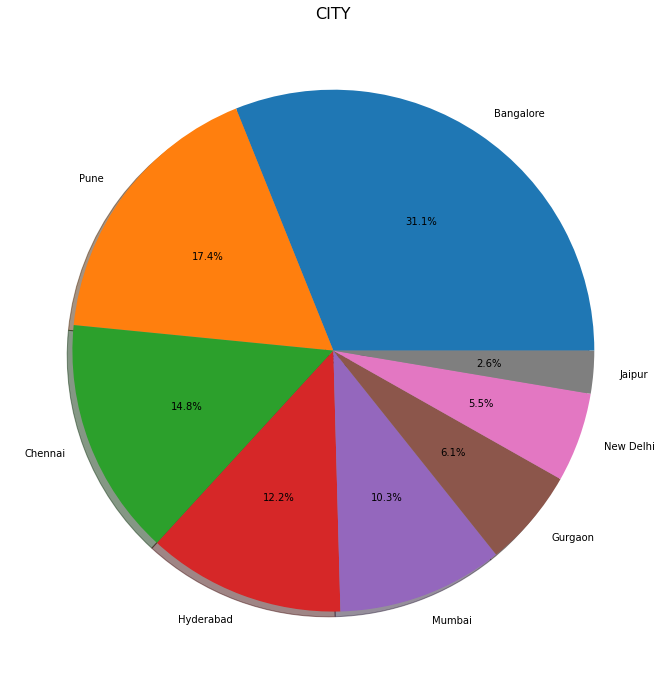

In [8]:
#pie chart for the target value

plt.figure(figsize= (12,12))
df_target= Data['CITY'].value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )

plt.title('CITY', fontsize= 16)

plt.show()

<AxesSubplot:xlabel='CATEGORY'>

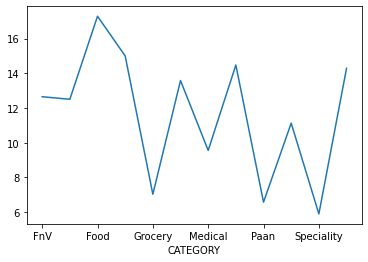

In [9]:
Data.groupby('CATEGORY').Commission.mean().sort_index(ascending=True).plot(kind='line')

<AxesSubplot:xlabel='CITY'>

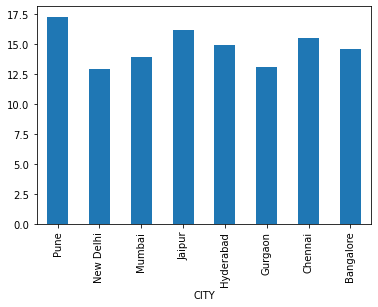

In [10]:
Data.groupby('CITY').Commission.mean().sort_index(ascending=False).plot(kind='bar')

In [11]:
Data1.groupby('Dunzo Tool Status').CITY.value_counts()

Dunzo Tool Status  CITY     
ACTIVE             BLR          5810
                   PNE          3377
                   MAA          2966
                   HYD          2448
                   MUM          1898
                   DHI          1074
                   GGN          1048
                   JPR           536
                   Bangalore     184
                   Mumbai        161
                   Pune          141
                   NOI            97
                   Hyderabad      59
                   Chennai        52
                   New Delhi      30
                   Gurgaon        22
                   Jaipur          8
INACTIVE           Bangalore     319
                   BLR           103
                   GGN            78
                   PNE            41
                   DHI            40
                   Mumbai         36
                   MUM            29
                   Pune           23
                   MAA            18
         

In [12]:
Data1.groupby('Dunzo Tool Status').CATEGORY.value_counts()

Dunzo Tool Status  CATEGORY  
ACTIVE             Food          13644
                   Grocery        2304
                   Meat           1329
                   Fnv             648
                   Medical         636
                   Wellness        331
                   Paan            316
                   Others          267
                   Pets            206
                   FnV             153
                   Speciality       76
                   Gifts             1
INACTIVE           Food            472
                   Grocery         147
                   Wellness         38
                   Others           21
                   Meat             15
                   Speciality       13
                   Pets             10
                   Medical           8
                   Fnv               5
                   FnV               1
                   Paan              1
Name: CATEGORY, dtype: int64

In [13]:
Data.groupby('A/C TYPE',as_index=False).agg({'Commission':'mean'})

,A/C TYPE,Commission
0,API Stores,12.664943
1,Enterprise,12.526651
2,Enterprise/Brand,13.106211
3,Enterprise/Brands,11.928889
4,MOCO,6.666667
5,Retail,15.869314
6,Urbanpiper,13.674118


In [14]:
Data['A/C TYPE'] = Data['A/C TYPE'].replace({'Enterprise/Brand':'Enterprise/Brands' })
Data['A/C TYPE'] = Data['A/C TYPE'].replace({'Enterprise':'Enterprise/Brands' })

<AxesSubplot:xlabel='A/C TYPE'>

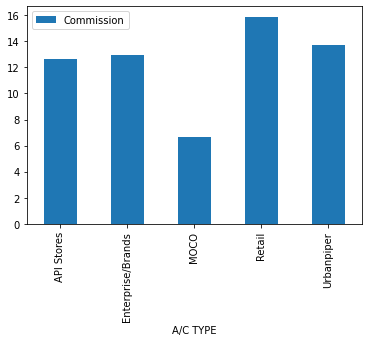

In [15]:

Data.groupby('A/C TYPE').agg({'Commission':'mean'}).plot(kind='bar')

In [16]:
Data1.groupby('MMM-YY').CITY.value_counts()

MMM-YY  CITY     
1       BLR          249
        PNE          216
        HYD          160
        MUM          128
        MAA          125
                    ... 
12      Chennai       42
        DHI           24
        New Delhi     23
        Gurgaon       17
        NOI            1
Name: CITY, Length: 151, dtype: int64

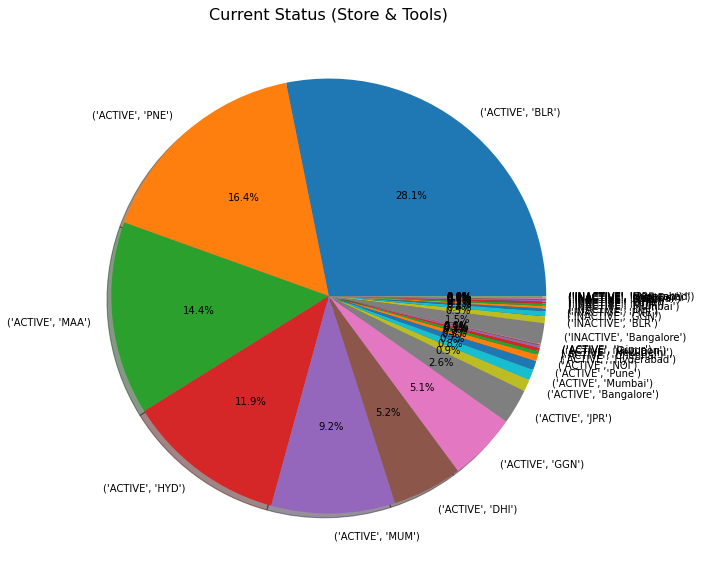

In [17]:

#pie chart for the target value

plt.figure(figsize= (10,10))
df_target= Data1.groupby('Dunzo Tool Status').CITY.value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )
plt.title('Current Status (Store & Tools)', fontsize= 16)
plt.show()

In [18]:
pd.crosstab(Data['CITY'], Data['CATEGORY'],normalize='columns')


CATEGORY,FnV,Fnv,Food,Gifts,Grocery,Meat,Medical,Others,Paan,Pets,Speciality,Wellness
CITY,,,,,,,,,,,,
Bangalore,0.136364,0.202144,0.313239,1.0,0.281696,0.349702,0.364907,0.555556,0.126183,0.351852,0.561798,0.322493
Chennai,0.129870,0.120980,0.151519,0.0,0.171219,0.137649,0.074534,0.100694,0.050473,0.083333,0.235955,0.192412
Gurgaon,0.019481,0.073507,0.052773,0.0,0.080310,0.061756,0.124224,0.086806,0.025237,0.134259,0.056180,0.092141
Hyderabad,0.220779,0.150077,0.128568,0.0,0.100693,0.110863,0.055901,0.062500,0.179811,0.134259,0.011236,0.116531
Jaipur,0.000000,0.045942,0.025359,0.0,0.032613,0.021577,0.018634,0.000000,0.088328,0.000000,0.000000,0.024390
Mumbai,0.311688,0.188361,0.082808,0.0,0.136567,0.136161,0.147516,0.006944,0.359621,0.134259,0.033708,0.062331
New Delhi,0.084416,0.049005,0.049940,0.0,0.080310,0.054315,0.080745,0.052083,0.075710,0.055556,0.056180,0.046070
Pune,0.097403,0.169985,0.195792,0.0,0.116592,0.127976,0.133540,0.135417,0.094637,0.106481,0.044944,0.143631


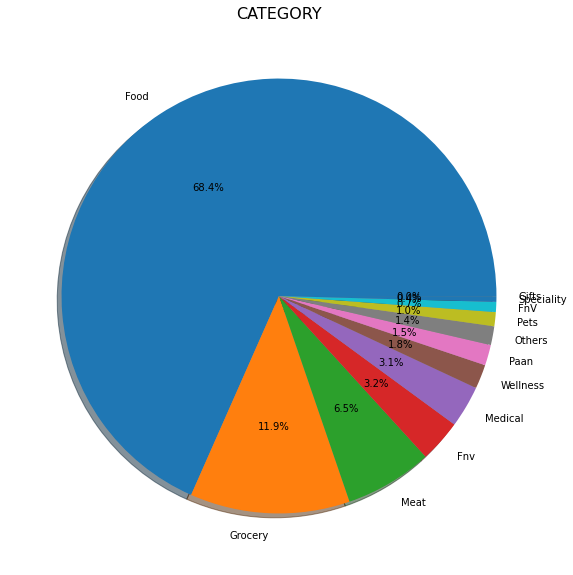

In [19]:
#pie chart for the target value

plt.figure(figsize= (10,10))
df_target= Data['CATEGORY'].value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )
plt.title('CATEGORY', fontsize= 16)
plt.show()

In [20]:
Data.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='Greens')\
        .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
AON,20645.000000,16.188569,7.284476,0.000000,11.000000,18.000000,21.000000,54.000000
Commission,20641.000000,15.028640,5.712295,0.000000,11.800000,15.000000,20.000000,47.700000


In [21]:
Data['MERCHANT NAME'].value_counts()

The Biryani Life                   33
The Good Bowl                      32
Lunchbox                           31
Zippy Feed [Hadapsar]              17
Sweet Truth                        12
                                   ..
China Express                       1
Hotel Sarvana Bhavan Anna Nagar     1
T H Vegetables and Fruit Shops      1
Srinathji's Restaurant              1
Desi Tadka                          1
Name: MERCHANT NAME, Length: 20054, dtype: int64

In [22]:
Data = Data.iloc[Data['MERCHANT NAME'].drop_duplicates(keep='last').index]
Data.shape

(20054, 6)

In [23]:

Data['Commission'].fillna(Data['Commission'].median(),inplace = True)
#Data['Dunzo Tool Status'].fillna(Data['Dunzo Tool Status'].mode()[0],inplace = True)

In [24]:
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False) 
dataType = Data.dtypes
null = Data.isnull().sum().sort_values(ascending=False)

missing_variables = pd.concat([null, percent,dataType], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables = missing_variables.head(19)
missing_variables


,Total,percent,Data Type
Commission,0,0.0,float64
AON,0,0.0,int64
CITY,0,0.0,object
CATEGORY,0,0.0,object
A/C TYPE,0,0.0,object
MERCHANT NAME,0,0.0,object


<Figure size 1152x648 with 0 Axes>

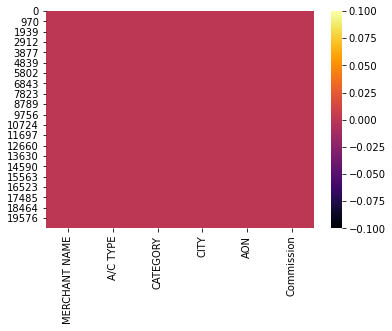

<Figure size 1152x648 with 0 Axes>

In [25]:
#NullValues with the help of Heatmap

sns.heatmap(Data.isnull(), cmap="inferno")
plt.figure(figsize=(16,9))


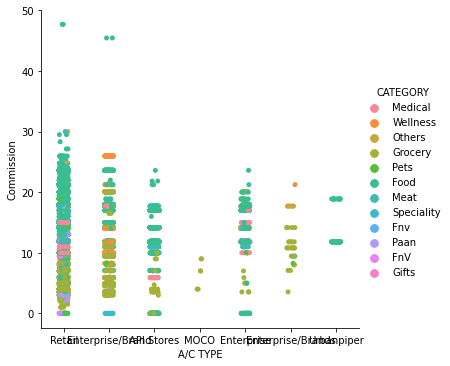

<Figure size 2160x2880 with 0 Axes>

In [26]:
#the distrubtion of activty over age for being the potential lead

sns.catplot(x="A/C TYPE", y="Commission" , hue="CATEGORY",data=Data1)
plt.figure(figsize=(30,40))
plt.show()

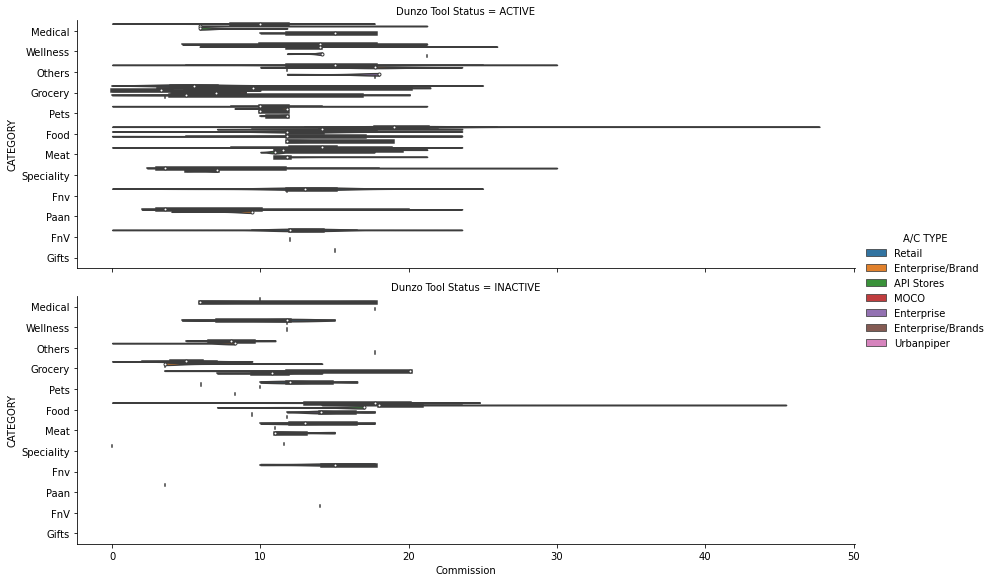

In [27]:
#Checking the spread Age and Gender for people who have credit card and are potential target

sns.catplot(x="Commission", y="CATEGORY",
                hue="A/C TYPE", row="Dunzo Tool Status",
                data=Data1,
                orient="h", height=4, aspect=3,
                kind="violin", dodge=True, cut=0, bw=.5)
plt.show()

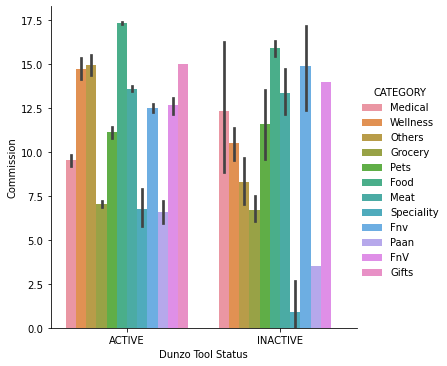

In [28]:
#the distrubtion of activty over age for being the potential lead

sns.catplot(x="Dunzo Tool Status", y="Commission" , hue="CATEGORY",kind="bar",data=Data1)
plt.show()


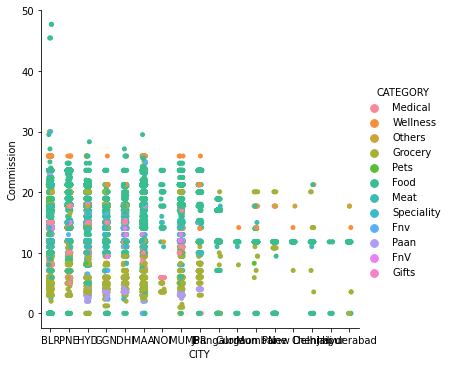

In [29]:
#checking the occupation type along with balance and which type has likiness of conversion for lead

sns.catplot(x="CITY", y="Commission", hue="CATEGORY",data=Data1)
plt.show()

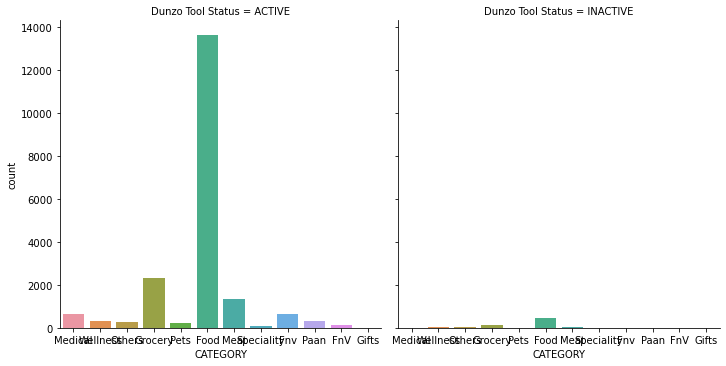

In [30]:
sns.factorplot("CATEGORY", col = "Dunzo Tool Status", data = Data1,kind = "count");
plt.show()

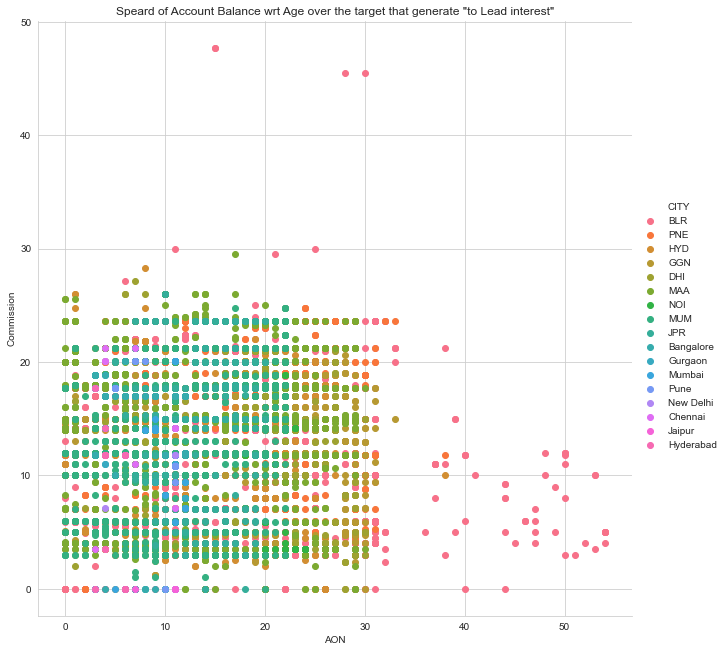

In [31]:
sns.set_style("whitegrid")
sns.FacetGrid(Data1, hue="CITY", size=9) \
   .map(plt.scatter, "AON","Commission") \
   .add_legend()
plt.title('Speard of Account Balance wrt Age over the target that generate "to Lead interest"')
plt.show()

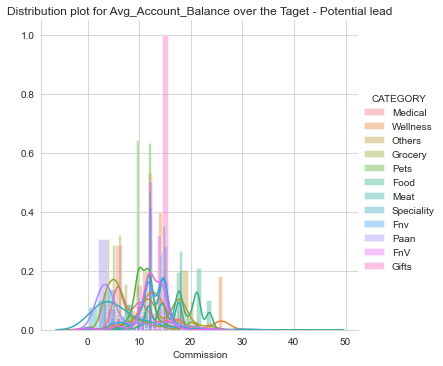

<Figure size 1152x648 with 0 Axes>

In [32]:
sns.FacetGrid(Data1,hue='CATEGORY',size=5).map(sns.distplot,'Commission').add_legend().set(title='Distribution plot for Avg_Account_Balance over the Taget - Potential lead')
plt.figure(figsize=(16,9))
plt.show()


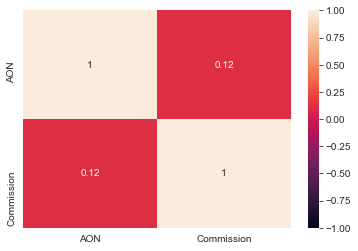

In [33]:
## Use Seaborn Heatmap to visualize correlation matrix
sns.heatmap(Data.corr(),annot=True,vmin=-1,vmax=1);

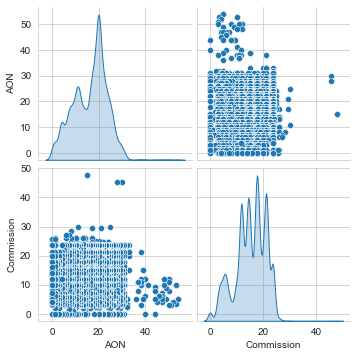

In [34]:
sns.pairplot(Data,diag_kind='kde');

In [35]:
Data.skew()

AON          -0.144938
Commission   -0.481342
dtype: float64

In [43]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [44]:
from pandas_profiling import ProfileReport


In [45]:
profile = ProfileReport(Data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [46]:
profile

In [39]:
def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

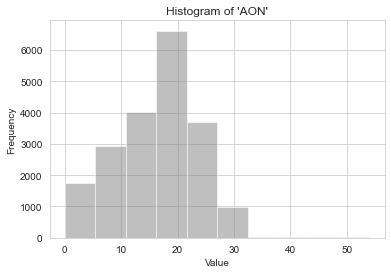

In [37]:
plot_histogram(Data['AON'])

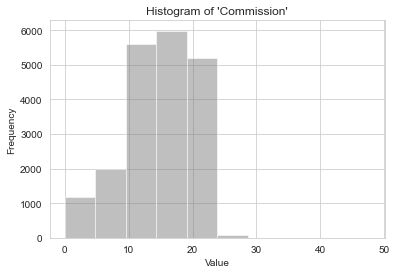

In [38]:
plot_histogram(Data['Commission'])

In [39]:
Data1=Data.copy()

In [40]:
Data

,MERCHANT NAME,A/C TYPE,CATEGORY,CITY,AON,Commission
0,Fame Balaji,Retail,Medical,Bangalore,54,5.0
1,Sundeep Medicals,Retail,Wellness,Bangalore,54,5.0
2,Famous Electronics,Retail,Others,Bangalore,54,5.0
4,Glasgow Computers,Retail,Others,Bangalore,54,5.0
5,Ram Medicals,Retail,Medical,Bangalore,54,5.0
...,...,...,...,...,...,...
20640,The Krispy Crust,Retail,Food,Chennai,0,23.6
20641,Sastha Farms Organic Store,Retail,Grocery,Chennai,0,4.0
20642,90ml,Retail,Food,Chennai,0,16.0
20643,Hotel Palmgrove,Retail,Food,Chennai,0,14.0


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['A/C TYPE'] = le.fit_transform(Data['A/C TYPE'])
Data['CATEGORY'] = le.fit_transform(Data['CATEGORY'])
Data['CITY'] = le.fit_transform(Data['CITY'])


In [42]:
#Data = pd.get_dummies(Data, columns=['Dunzo Tool Status'], drop_first=True)


In [43]:
Data

,MERCHANT NAME,A/C TYPE,CATEGORY,CITY,AON,Commission
0,Fame Balaji,3,6,0,54,5.0
1,Sundeep Medicals,3,11,0,54,5.0
2,Famous Electronics,3,7,0,54,5.0
4,Glasgow Computers,3,7,0,54,5.0
5,Ram Medicals,3,6,0,54,5.0
...,...,...,...,...,...,...
20640,The Krispy Crust,3,2,1,0,23.6
20641,Sastha Farms Organic Store,3,4,1,0,4.0
20642,90ml,3,2,1,0,16.0
20643,Hotel Palmgrove,3,2,1,0,14.0


In [44]:
subset=Data.iloc[:,1:6] 

In [45]:
subset

,A/C TYPE,CATEGORY,CITY,AON,Commission
0,3,6,0,54,5.0
1,3,11,0,54,5.0
2,3,7,0,54,5.0
4,3,7,0,54,5.0
5,3,6,0,54,5.0
...,...,...,...,...,...
20640,3,2,1,0,23.6
20641,3,4,1,0,4.0
20642,3,2,1,0,16.0
20643,3,2,1,0,14.0


In [46]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
subset_scalar = scaler.fit_transform(subset)   

In [47]:
subset_df=pd.DataFrame(subset_scalar,columns=subset.columns)   #Creating a dataframe of the above results

In [48]:
subset_df.skew()

A/C TYPE     -1.211958
CATEGORY      2.195074
CITY          0.406595
AON          -0.144938
Commission   -0.481342
dtype: float64

In [49]:
#plot_histogram(Data1['Dunzo Tool Status_1'])

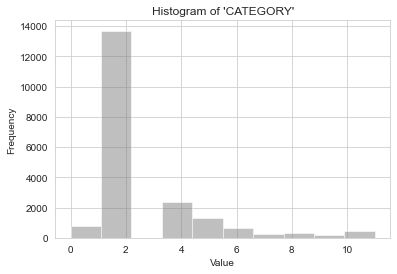

In [50]:
plot_histogram(Data['CATEGORY'])

In [51]:
## Iterate the K-Means for different values of clusters. Compute the error term and store in an object
from sklearn.cluster import KMeans

cluster_range = range( 1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 50,init='k-means++')
    clusters.fit(subset_df)
    cluster_errors.append( clusters.inertia_ )    # capture the intertia

In [52]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df

,num_clusters,cluster_errors
0,1,100270.000000
1,2,76579.377156
2,3,59589.997844
3,4,50727.681484
4,5,44282.762814
5,6,39882.982142
6,7,35829.763508
7,8,32568.501596
8,9,30441.402388
9,10,28516.397089


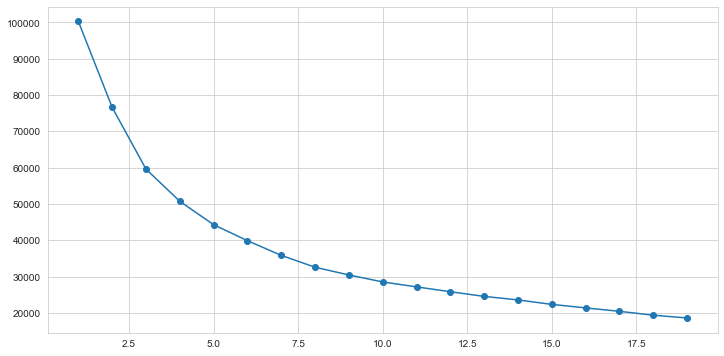

In [53]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [54]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(subset_df)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [55]:
centroids = kmeans.cluster_centers_ 
centroids

array([[-1.72411784, -0.28746585, -0.14043584, -0.17759558, -0.39897519],
       [ 0.32893738,  1.38364411, -0.05191368, -0.31849564, -1.00593074],
       [ 0.56908689, -0.50335919,  0.08178919,  0.21726541,  0.61884534]])

In [56]:
centroid_df = pd.DataFrame(centroids, columns = subset_df.columns )

In [57]:
centroid_df

,A/C TYPE,CATEGORY,CITY,AON,Commission
0,-1.724118,-0.287466,-0.140436,-0.177596,-0.398975
1,0.328937,1.383644,-0.051914,-0.318496,-1.005931
2,0.569087,-0.503359,0.081789,0.217265,0.618845


In [58]:
dataset=subset_df.copy()

In [59]:
dataset['KmeansLabel']=kmeans.labels_

In [60]:
Data1['KmeansLabel']=dataset['KmeansLabel']


In [61]:
Data1['KmeansLabel'].value_counts()

2.0    10580
1.0     4722
0.0     4213
Name: KmeansLabel, dtype: int64

In [62]:
Data1.groupby('KmeansLabel').Commission.mean().sort_index(ascending=True)

KmeansLabel
0.0    13.964821
1.0    14.283808
2.0    16.071076
Name: Commission, dtype: float64

In [63]:
Data1.groupby('CITY').KmeansLabel.value_counts()

CITY       KmeansLabel
Bangalore  2.0            2995
           1.0            1540
           0.0            1529
Chennai    2.0            1448
           1.0             656
           0.0             627
Gurgaon    2.0             707
           1.0             274
           0.0             230
Hyderabad  2.0            1471
           1.0             531
           0.0             421
Jaipur     2.0             347
           1.0             121
           0.0              75
Mumbai     2.0            1018
           1.0             581
           0.0             354
New Delhi  2.0             580
           0.0             283
           1.0             244
Pune       2.0            2014
           1.0             775
           0.0             694
Name: KmeansLabel, dtype: int64

In [64]:
Data1.groupby('CATEGORY').KmeansLabel.value_counts()

CATEGORY    KmeansLabel
FnV         0.0              44
            1.0              37
            2.0              28
Fnv         2.0             244
            1.0             232
            0.0             173
Food        2.0            7795
            0.0            2979
            1.0            2684
Grocery     2.0            1018
            1.0             790
            0.0             494
Meat        2.0             575
            1.0             385
            0.0             239
Medical     2.0             276
            1.0             188
            0.0             111
Others      2.0             177
            1.0              68
            0.0              22
Paan        2.0             183
            1.0              73
            0.0              48
Pets        1.0              89
            2.0              73
            0.0              33
Speciality  2.0              59
            1.0              25
            0.0               4
Wellness    2.0 

In [65]:
Data1=Data.copy()
Data1 = Data1.drop(['Commission'])
target

KeyError: "['Commission'] not found in axis"